# Ejercicio 18:
1- Lograr la secuencia extendida

2- Realizar el diagrama ojo para PAM4

3- Ampliar la gráfica del diagrama ojo para visualizarla más cercana a la siguiente imagen:



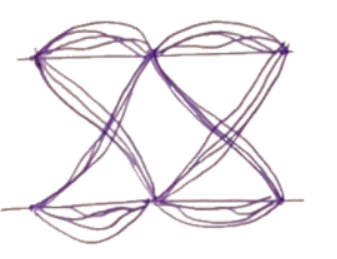

# Filtro transmisor

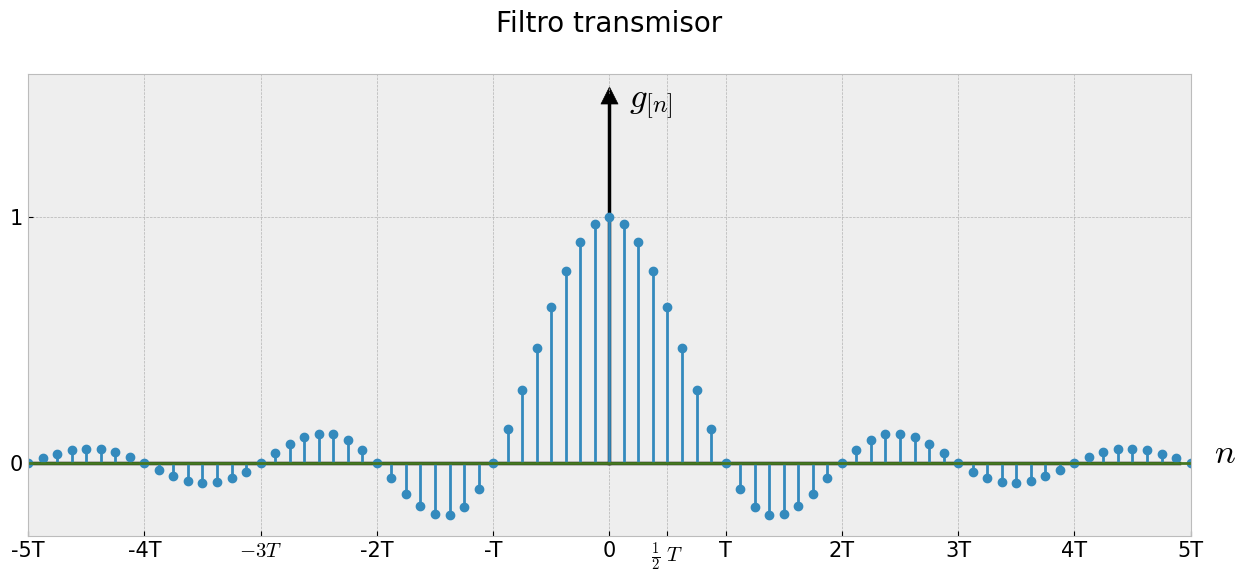

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use( 'bmh' )

# ====================
#  Generación de g[n]
# ====================

fB = 32e9    # Velocidad de simbolos (baud rate)
# Es la frecuencia de los simbolos, 32 GBaudios

T = 1 / fB   # Tiempo entre símbolos
M = 8        # Factor de sobremuestreo
fs = fB * M  # Sample rate

alpha = 0.1  # Factor de roll-off
L = 20       # ( 2 * L * M + 1 ) es el largo del filtro sobremuestreado

t = np.arange( -L, L, 1 / M ) * T

gn = np.sinc( t / T ) * np.cos( np.pi * alpha * t / T ) / ( 1 - 4 * alpha**2 * t**2 / T**2 )

params = { 'legend.fontsize': 'large',
           'figure.figsize': ( 15, 6 ),
           'axes.labelsize': 20,
           'axes.titlesize': 20,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'axes.titlepad': 30 }
plt.rcParams.update( params )

fig, ax = plt.subplots()

x1_ejeVertical, y1_ejeVertical = [ 0, 0 ], [ 0, 1.5 ]
ax.plot( x1_ejeVertical, y1_ejeVertical, linewidth = 2.5, color = 'black' )
ax.scatter( x1_ejeVertical[ 1 ], y1_ejeVertical[ 1 ], marker = "^", color = 'black', s = 150 )

x1_ejeHorizontal, y1_ejeHorizontal = [ -5*T, 4.9*T ], [ 0, 0 ]
ax.plot( x1_ejeHorizontal, y1_ejeHorizontal, linewidth = 2.5, color = 'black' )

ax.stem( t, gn )
ax.set_title( 'Filtro transmisor' )

plt.text( T/6, 1.45, r'$g_{[n]}$', fontsize = 25, color = 'black' )
# plt.text( T/6, 1.45, r'$\int_{a}^{b} f(x)dx = F(b) - F(a)$', fontsize = 25, color = 'black' )

plt.text( 5.2*T, 0, r'$n$', fontsize = 25, color = 'black' )

abcisas = [ -5*T, -4*T, -3*T, -2*T, -T, 0, T/2, T, 2*T, 3*T, 4*T, 5*T ]
textos_abcisa = [ '-5T', '-4T', r'$-3T$', '-2T', '-T', '0', r'$\frac{1}{2} \ T$', 'T', '2T', '3T', '4T', '5T' ]
plt.xticks( abcisas, textos_abcisa )
ordenadas = [ 0, 1 ]
textos_ordenada = [ '0', '1' ]
plt.yticks( ordenadas, textos_ordenada )

plt.xlim( [ -5*T, 5*T ] )

plt.show()

# Generación de símbolos

In [2]:
import numpy as np
from random import randrange, seed
import datetime

cantidad_simbolos = 1000
simbolos_PAM4 = np.empty( cantidad_simbolos )

for i in range( cantidad_simbolos ) :
    simbolos_PAM4[ i ] = randrange( -3, 4, 2 )

print( '\nUna muestra de los símbolos generados:\n', simbolos_PAM4[ 0 : 50 ] )


Una muestra de los símbolos generados:
 [ 1. -3. -3. -1.  1.  1.  3. -1. -3. -3.  1.  3.  3. -3.  1.  1.  3. -3.
  1.  3.  3. -1.  1.  3.  1. -3. -3. -3.  3.  1.  3. -1. -3.  1.  1. -1.
 -1. -3.  3.  3. -3.  3. -1.  1. -3.  3. -1. -1.  3. -3.]


# Secuencia extendida

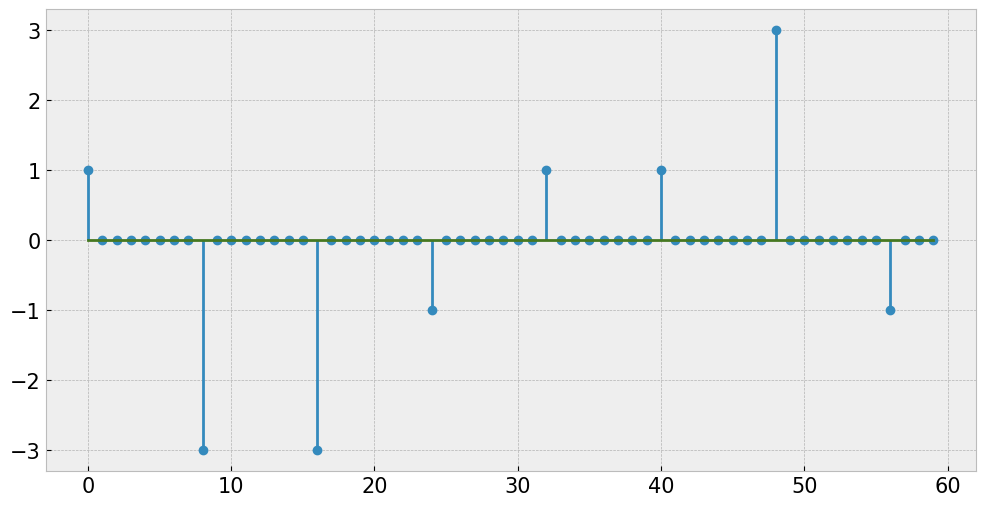

In [8]:
xn = np.zeros( cantidad_simbolos * M )

for i in range( cantidad_simbolos ) :
    xn[ i * M ] = simbolos_PAM4[ i ]

params = { 'legend.fontsize': 'large',
           'figure.figsize': ( 12, 6 ),
           'axes.labelsize': 20,
           'axes.titlesize': 20,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'axes.titlepad': 30 }
plt.rcParams.update( params )

fig, ax = plt.subplots()

valores = 60
ax.stem( np.arange( 0, valores ), xn[ 0 : valores ] )

plt.show()

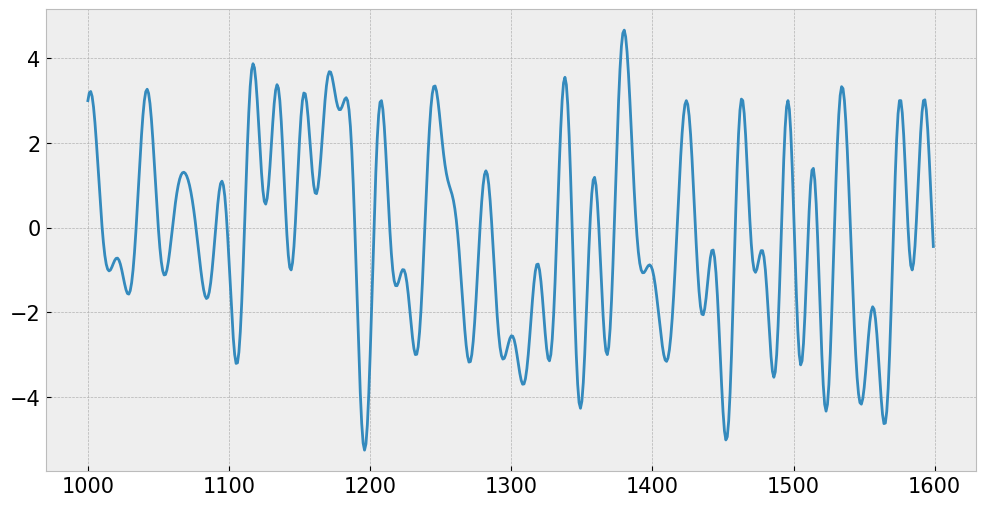

In [10]:
from scipy.signal import convolve

sn = convolve( xn, gn )

fig, ax = plt.subplots()

valores = 1600
ax.plot( np.arange( 1000, valores ), sn[ 1000 : valores ] )
#ax.stem( np.arange( 1000, valores ), sn[ 1000 : valores ] )

plt.show()


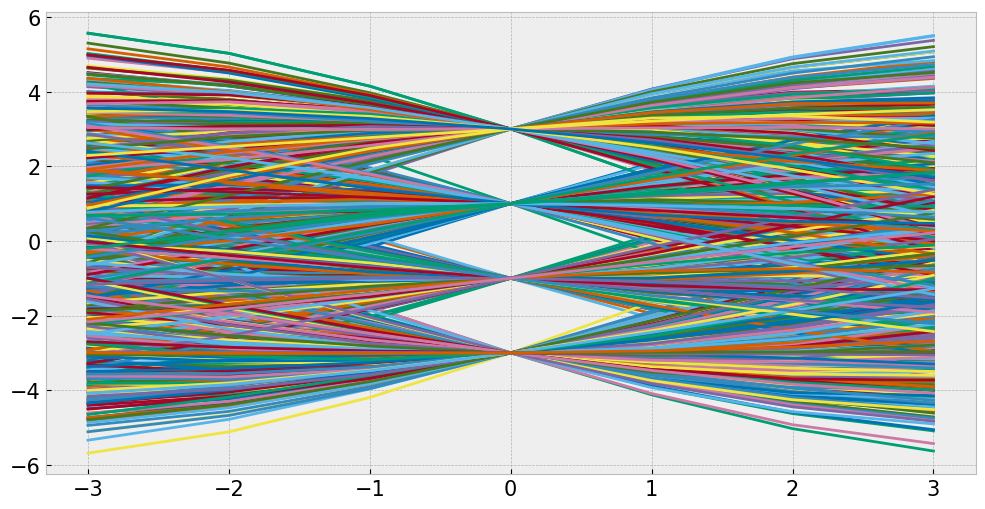

In [5]:

d = 4;  # Delay para centrar el ojo

for i in range( 2 * L + 1, cantidad_simbolos - ( 2 * L + 1 ) ) :
    sn_p = sn[ i * M + d : i * M + d + M ]
    plt.plot( np.arange( -3, 4 ), sn_p[ 1 : 8 ] )

plt.show()


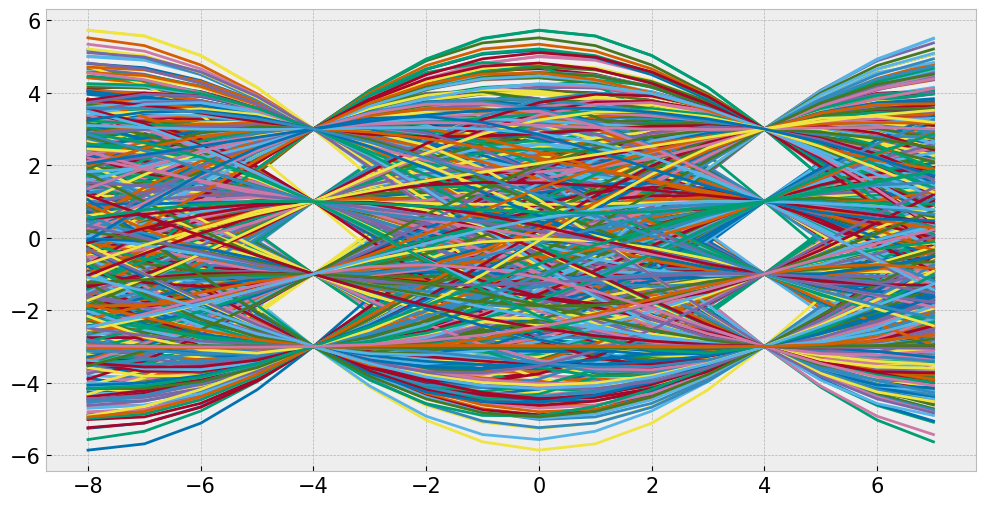

In [11]:
params = { 'legend.fontsize': 'large',
           'figure.figsize': ( 12, 6 ),
           'axes.labelsize': 20,
           'axes.titlesize': 20,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'axes.titlepad': 30 }
plt.rcParams.update( params )

fig, ax = plt.subplots()

samples_to_plot = 2 * M # Plot two symbol periods

for i in range( 2 * L + 1, cantidad_simbolos - ( 2 * L + 1 ) ) :
    # Ensure the slice does not go out of bounds
    start_index = i * M + d - samples_to_plot // 2
    end_index = start_index + samples_to_plot

    if start_index >= 0 and end_index <= len(sn):
        sn_p = sn[ start_index : end_index ]
        plt.plot( np.arange( -samples_to_plot // 2, samples_to_plot // 2 ), sn_p )


plt.show()

Este código genera un diagrama de ojo para la señal PAM4.

##Desglose:

- d = 4:
Esto establece un retardo (d) de 4 muestras, que se utiliza para centrar el diagrama de ojo.

- for i in range(2 * L + 1, cantidad_simbolos - (2 * L + 1)):
Este bucle itera a través de los símbolos generados, omitiendo los primeros y últimos 2*L + 1 símbolos para evitar los efectos de borde de la convolución.

- sn_p = sn[i * M + d : i * M + d + M]:
Esta línea extrae un segmento de la señal convolucionada sn. El segmento comienza d muestras después del inicio del i-ésimo símbolo y tiene una longitud de M muestras, lo que corresponde a un período de símbolo.

- plt.plot(np.arange(-3, 4), sn_p[1 : 8]):
Esto grafica el segmento extraído de la señal. El eje x se establece de -3 a 3, y grafica las muestras desde el segundo hasta el octavo elemento de sn_p. Esto se hace para alinear el gráfico con la representación deseada del diagrama de ojo.

- plt.show():
Esto muestra el gráfico generado.

En esencia, el código divide la señal convolucionada en segmentos que corresponden a símbolos individuales, los alinea según el retardo d y luego superpone estos segmentos para crear el diagrama de ojo. El diagrama de ojo representa visualmente las características de la señal y ayuda a evaluar la integridad de la misma.